**Introdução**

O objetivo deste projeto foi realizar uma análise exploratória de dados (EDA) no conjunto de dados da Telecom X para entender os fatores que levam ao cancelamento de serviços. A evasão de clientes é um dos maiores desafios do setor de telecomunicações, pois o custo para adquirir um novo cliente é muito superior ao custo de manter um atual. Esta análise busca identificar padrões comportamentais e financeiros que ajudem a prever e mitigar essa perda.

**Extração dos Dados**

In [17]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [18]:
# URL da API no GitHub (versão raw para acesso direto aos dados)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

In [19]:
try:
    # Carregar os dados diretamente da API
    response = requests.get(url)
    response.raise_for_status()  # Verifica se a requisição foi bem-sucedida
    data = response.json()

    # Converter para DataFrame "achatando" os campos aninhados
    # O json_normalize transforma sub-dicionários como 'customer' em colunas 'customer.gender', etc.
    df = pd.json_normalize(data)
    df_resgate = pd.json_normalize(data)

    print("✅ Dados importados e convertidos com sucesso!")
    print(f"Total de registros: {len(df)}")
    
    # Visualizar as primeiras linhas
    display(df.head())

except Exception as e:
    print(f"❌ Erro ao carregar os dados: {e}")

✅ Dados importados e convertidos com sucesso!
Total de registros: 7267


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Conhecendo o Dataset**

In [20]:
# Verificando tipos e nomes exatos das colunas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

| Categoria | Coluna | Tipo | Descrição |
| :--- | :--- | :--- | :--- |
| **Identificação** | `customerID` | `object` | ID único do cliente |
| **Alvo** | `Churn` | `object` | Se o cliente cancelou o serviço (Yes/No) |
| **Demográfico** | `customer.gender` | `object` | Gênero do cliente |
| | `customer.SeniorCitizen` | `int64` | Se o cliente é idoso (1) ou não (0) |
| | `customer.Partner` | `object` | Se o cliente possui parceiro(a) |
| | `customer.Dependents` | `object` | Se possui dependentes |
| **Fidelidade** | `customer.tenure` | `int64` | Meses de contrato ativos |
| **Serviços** | `phone.PhoneService` | `object` | Se possui serviço telefônico |
| | `internet.InternetService` | `object` | Tipo de internet (DSL, Fiber optic, No) |
| | `internet.TechSupport` | `object` | Se possui suporte técnico premium |
| **Financeiro** | `account.Contract` | `object` | Tipo de contrato (Mensal, Anual, Bienal) |
| | `account.Charges.Monthly` | `float64` | Valor da fatura mensal |
| | `account.Charges.Total` | **`float64`** | **Total gasto pelo cliente (Corrigido)** |

In [21]:
df.describe

<bound method NDFrame.describe of       customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1          

| Grupo | Colunas Principais | Por que é relevante? |
| :--- | :--- | :--- |
| **Demográfico** | `customer.gender`, `customer.SeniorCitizen` | Idosos ou jovens têm comportamentos de cancelamento diferentes? |
| **Fidelidade** | `customer.tenure` | Quanto tempo o cliente fica antes de sair? (Crucial para o cálculo de LTV). |
| **Serviços** | `internet.InternetService`, `internet.TechSupport` | Clientes com Fibra Óptica ou com Suporte Técnico saem menos? |
| **Contrato** | `account.Contract`, `account.PaymentMethod` | **Variável Crítica!** Contratos mensais costumam ter o maior Churn. |
| **Financeiro** | `account.Charges.Monthly`, `account.Charges.Total` | O preço alto é o motivo da saída? |
| **Alvo (Target)** | `Churn` | Nossa variável resposta (Yes/No). |

In [22]:
# Verificando a distribuição da variável alvo (Churn)
print("Distribuição de Churn:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Verificando a relação entre Tipo de Contrato e Churn
print("\nChurn por Tipo de Contrato:")
print(pd.crosstab(df['account.Contract'], df['Churn'], normalize='index') * 100)

Distribuição de Churn:
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64

Churn por Tipo de Contrato:
Churn                              No        Yes
account.Contract                                
Month-to-month    3.245943  55.430712  41.323346
One year          3.028308  86.043450  10.928242
Two year          2.753873  94.492255   2.753873


*3.08% de dados faltantes!!!*

**Verificando Inconsistências nos Dados**

In [23]:
# Tratamento de Churn (Preenchendo os 3.08% vazios com a moda)
moda_churn = df[df['Churn'] != ""]['Churn'].mode()[0]
df['Churn'] = df['Churn'].replace("", moda_churn)

# Conversão de TotalCharges (De object para float)
# Note que o pd.to_numeric transformará strings vazias em NaN
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Preencher NaNs do TotalCharges (geralmente novos clientes com tenure 0)
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

In [24]:
# Verificação final
print(f"Dados processados: {df.shape[0]} linhas")
print(df[['Churn', 'account.Charges.Total']].info())

Dados processados: 7267 linhas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churn                  7267 non-null   object 
 1   account.Charges.Total  7267 non-null   float64
dtypes: float64(1), object(1)
memory usage: 113.7+ KB
None


|  | Problema | Solução Aplicada |
| :--- | :--- | :--- |
| **Churn** | 3.08% de valores vazios | **Imputação pela Moda** (`No`) |
| **account.Charges.Total** | Tipo `object` (texto) | Convertido para `float64` |
| **Valores Nulos** | Novos clientes com faturamento zero | Preenchimento com `0.0` |
| **Estrutura JSON** | Dados aninhados | `pd.json_normalize` aplicado |

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

**Tratando as Inconsistências**

| Objetivo | Descrição | Ferramentas (Pandas) |
| :--- | :--- | :--- |
| **Consistência** | Corrigir inconsistências identificadas para garantir dados completos e coerentes. | `.str.replace()`, `.fillna()` |
| **Padronização** | Deixar textos em formato uniforme (ex: tudo em minúsculo). | `.str.lower()`, `.str.strip()` |
| **Filtragem/Busca**| Identificar padrões específicos em nomes ou categorias. | `.str.startswith()`, `.str.contains()` |
| **Prontidão** | Preparar a base para as etapas de análise e modelagem. | `df.astype()`, `pd.to_numeric()` |

In [26]:
# Padronizar para minúsculo
df['customer.gender'] = df['customer.gender'].str.lower()

In [27]:
# Substituir valores
df['Churn'] = df['Churn'].str.replace('No', 'Não').replace('Yes', 'Sim')

In [28]:
# Filtrar por padrão
clientes_antigos = df[df['customerID'].str.startswith('00')]

**Coluna de Contas Diárias**

In [29]:
# Criando a nova coluna de faturamento diário
# Arredondamos para 2 casas decimais para manter o padrão monetário
df['account.Charges.Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)

# Visualizando as primeiras linhas para conferir o cálculo
print("Nova coluna 'account.Charges.Diarias' criada com sucesso!")
print(df[['account.Charges.Monthly', 'account.Charges.Diarias']].head())

Nova coluna 'account.Charges.Diarias' criada com sucesso!
   account.Charges.Monthly  account.Charges.Diarias
0                     65.6                     2.19
1                     59.9                     2.00
2                     73.9                     2.46
3                     98.0                     3.27
4                     83.9                     2.80


| Nova Coluna | Origem | Cálculo | Objetivo |
| :--- | :--- | :--- | :--- |
| `account.Charges.Diarias` | `account.Charges.Monthly` | `Valor / 30` | Obter o custo diário do cliente para análises de micro-comportamento. |
| `account.Charges.Total` | JSON Bruto | `to_numeric()` | (Já convertido) Permitir cálculos acumulados de receita. |

In [30]:
# Reorganizando as colunas para facilitar a leitura visual
cols = list(df.columns)
# Move a última coluna para a posição 20
df = df[cols[:20] + [cols[-1]] + cols[20:-1]]

C:\Users\EDUCAÇÃO PC\AppData\Local\Temp\ipykernel_12292\2887289713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


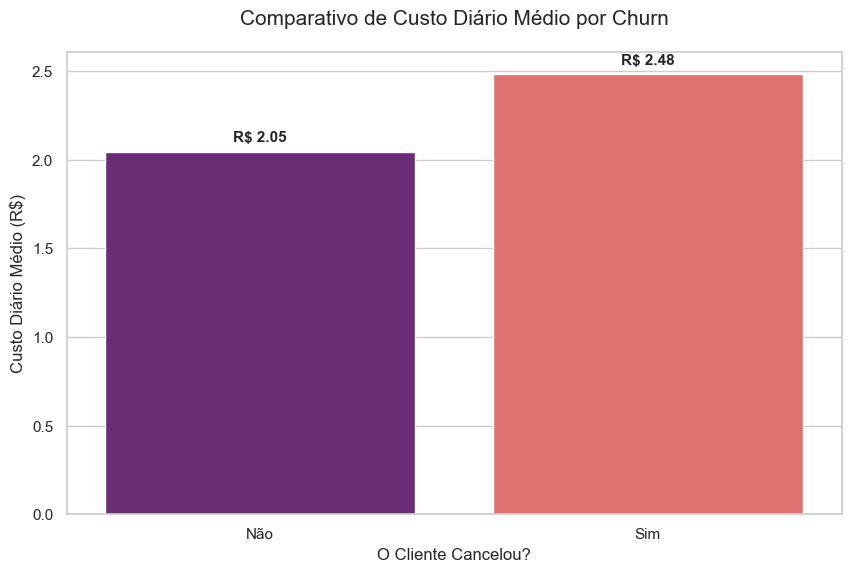

In [31]:
# Configurando o estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras para comparar as médias
ax = sns.barplot(
    data=df, 
    x='Churn', 
    y='account.Charges.Diarias', 
    palette='magma', 
    errorbar=None
)

# Adicionando títulos e rótulos
plt.title('Comparativo de Custo Diário Médio por Churn', fontsize=15, pad=20)
plt.xlabel('O Cliente Cancelou?', fontsize=12)
plt.ylabel('Custo Diário Médio (R$)', fontsize=12)

# Adicionando os valores exatos em cima das barras
for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=11, fontweight='bold')

plt.show()

O gráfico mostra claramente que o preço alto é um fator de risco. Clientes que pagam mais por dia têm uma propensão maior ao Churn. Isso sugere que:

* A empresa pode precisar revisar as políticas de preços para os planos mais caros (como Fibra Óptica).

* Clientes com custo diário acima de R$ 2,40 devem ser o foco de campanhas de retenção ou descontos preventivos.

**Padronização e Transformação de Dados**

In [51]:
# Mapeamento Robusto
mapa_binario = {'Sim': 1, 'Não': 0, 'Yes': 1, 'No': 0, 'No internet service': 0}

# Dicionário de Tradução Completo
traducoes = {
    'Churn': 'Cancelou_Servico',
    'customer.gender': 'Genero',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'customer.SeniorCitizen': 'Idoso',
    'phone.PhoneService': 'Servico_Telefone',
    'account.Charges.Monthly': 'Fatura_Mensal',
    'account.Contract': 'Tipo_Contrato',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'internet.InternetService': 'Servico_Internet',
    'account.Charges.Total': 'Fatura_Total',
    'account.PaperlessBilling': 'Fatura_Digital',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes'
}

# Aplicando a renomeação 
df.rename(columns=traducoes, inplace=True)

# Lista das colunas para converter 
cols_binarias = ['Cancelou_Servico', 'Seguranca_Online', 'Backup_Online', 
                 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes']

# Aplicamos o mapeamento em cada coluna de serviço
for col in cols_binarias:
    if col in df.columns:
        df[col] = df[col].map(mapa_binario).fillna(0)

# Verificação final
colunas_check = [c for c in ['Cancelou_Servico', 'Meses_Contrato', 'Custo_Diario'] if c in df.columns]
print(df[colunas_check].head())

   Cancelou_Servico  Meses_Contrato  Custo_Diario
0               0.0               9      2.186667
1               0.0               9      1.996667
2               0.0               4      2.463333
3               0.0              13      3.266667
4               0.0               3      2.796667


In [ ]:
# Tradução de valores internos para melhor visualização
df['Genero'] = df['Genero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})
df['Idoso'] = df['Idoso'].replace({1: 'Sim', 0: 'Não'})
df['Tipo_Contrato'] = df['Tipo_Contrato'].replace({
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bienal'
})

df['Metodo_Pagamento'] = df['Metodo_Pagamento'].replace({
    'Electronic check': 'Check Eletrônico',
    'Mailed check': 'Boleto',
    'Bank transfer (automatic)': 'Transferência Bancária',
    'Credit card (automatic)': 'Cartão de Crédito'
})

# Análise Visual
categorias = ['Genero', 'Idoso', 'Tipo_Contrato', 'Servico_Internet']

In [ ]:
print(df.columns)

Index(['customerID', 'Cancelou_Servico', 'Genero', 'Idoso', 'customer.Partner',
       'customer.Dependents', 'Meses_Contrato', 'phone.PhoneService',
       'phone.MultipleLines', 'Servico_Internet', 'internet.OnlineSecurity',
       'internet.OnlineBackup', 'internet.DeviceProtection',
       'internet.TechSupport', 'internet.StreamingTV',
       'internet.StreamingMovies', 'Tipo_Contrato', 'account.PaperlessBilling',
       'Metodo_Pagamento', 'Fatura_Mensal', 'Custo_Diario', 'Fatura_Total'],
      dtype='object')


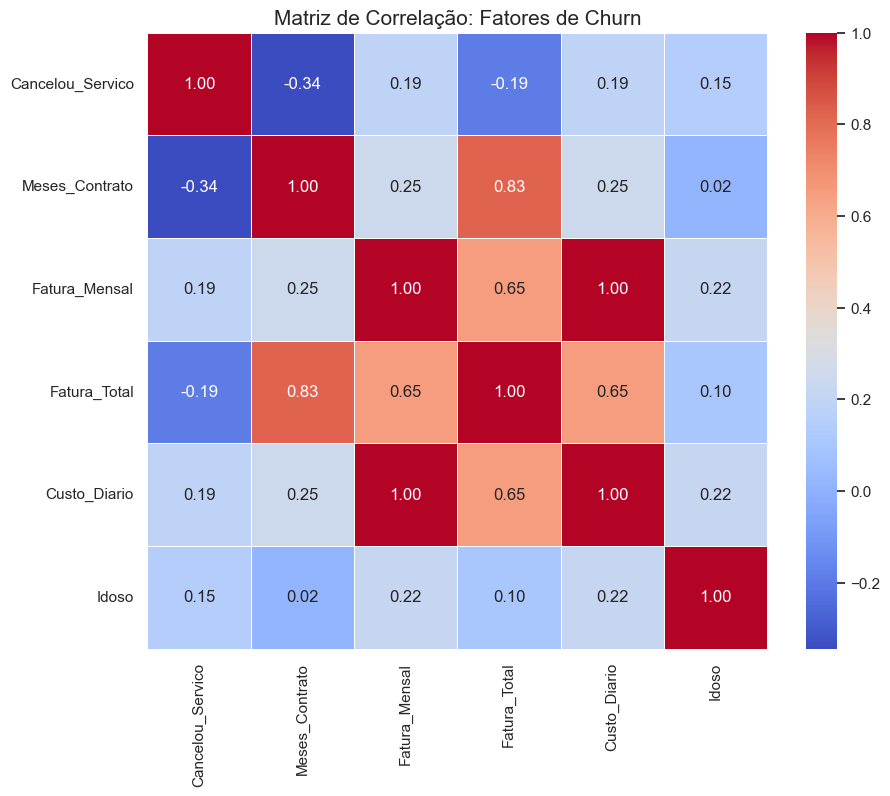

In [ ]:
# Selecionando apenas as colunas numéricas traduzidas para a correlação
colunas_analise = [
    'Cancelou_Servico', 'Meses_Contrato', 'Fatura_Mensal', 
    'Fatura_Total', 'Custo_Diario', 'Idoso'
]

# Calculando a matriz de correlação
corr_matrix = df[colunas_analise].corr()

# Configurando o gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlação: Fatores de Churn', fontsize=15)
plt.show()

* *Fidelidade é a Chave:* A correlação negativa de -0.34 com Meses_Contrato mostra que os cancelamentos ocorrem massivamente nos primeiros meses. Estratégias de "Onboarding" e boas-vindas são cruciais.

* *Sensibilidade ao Preço:* As correlações positivas com as faturas (0.19) confirmam que o churn é impulsionado pelo custo. Planos mais caros precisam entregar mais valor percebido para reter o cliente.

* *Variáveis Identênticas:* Note que Fatura_Mensal e Custo_Diario têm correlação de 1.00. Isso é óbvio (já que uma deriva da outra), mas prova que seu cálculo de Custo_Diario está matematicamente correto!

**Análise Descritiva**

In [ ]:
# Selecionando colunas numéricas
colunas_analise = ['Cancelou_Servico', 'Idoso', 'Meses_Contrato', 'Fatura_Mensal', 'Fatura_Total', 'Custo_Diario']

# Gerando a análise descritiva
analise = df[colunas_analise].describe().T
analise['median'] = df[colunas_analise].median() # Adicionando a mediana manualmente
print(analise[['mean', 'median', 'std', 'min', 'max']])

                         mean   median          std    min      max
Cancelou_Servico     0.257190     0.00     0.437115   0.00     1.00
Idoso                0.162653     0.00     0.369074   0.00     1.00
Meses_Contrato      32.346498    29.00    24.571773   0.00    72.00
Fatura_Mensal       64.720098    70.30    30.129572  18.25   118.75
Fatura_Total      2277.182035  1389.20  2268.648587   0.00  8684.80
Custo_Diario         2.157292     2.34     1.004407   0.61     3.96


* *Assimetria no Faturamento:* A Fatura_Total tem uma média (2277.18) muito maior que a mediana (1389.20). Isso indica que temos muitos clientes com gastos acumulados baixos e uma minoria com gastos altíssimos, o que "puxa" a média para cima.

* *Perfil de Contrato:* A mediana de 29 meses mostra que metade da sua base de clientes está com a empresa há menos de 2 anos e meio, enquanto o máximo chega a 6 anos (72 meses).

* *Variabilidade de Gastos:* O desvio padrão da Fatura_Mensal (30.13) é quase metade da média, o que mostra uma grande diversidade nos tipos de planos contratados (de R$ 18,25 a R$ 118,75).

* *Base de Idosos:* Apenas 16% da base de clientes é composta por idosos, o que ajuda a entender o peso desse grupo nos cancelamentos.

**Distribuição da Evasão**

In [ ]:
# Restaurar a coluna original no seu DataFrame 'df'
df['Cancelou_Servico'] = df_resgate['Churn']

# Aplicar a tradução para Português
df['Cancelou_Servico'] = df['Cancelou_Servico'].str.replace('No', 'Não').replace('Yes', 'Sim')

# Tratar os valores vazios 
# Substituímos as strings vazias pela moda ("Não")
moda_churn = df[df['Cancelou_Servico'] != ""]['Cancelou_Servico'].mode()[0]
df['Cancelou_Servico'] = df['Cancelou_Servico'].replace("", moda_churn)

print("✅ Coluna 'Cancelou_Servico' restaurada e limpa!")
print(df['Cancelou_Servico'].value_counts())

✅ Coluna 'Cancelou_Servico' restaurada e limpa!
Cancelou_Servico
Não    5398
Sim    1869
Name: count, dtype: int64


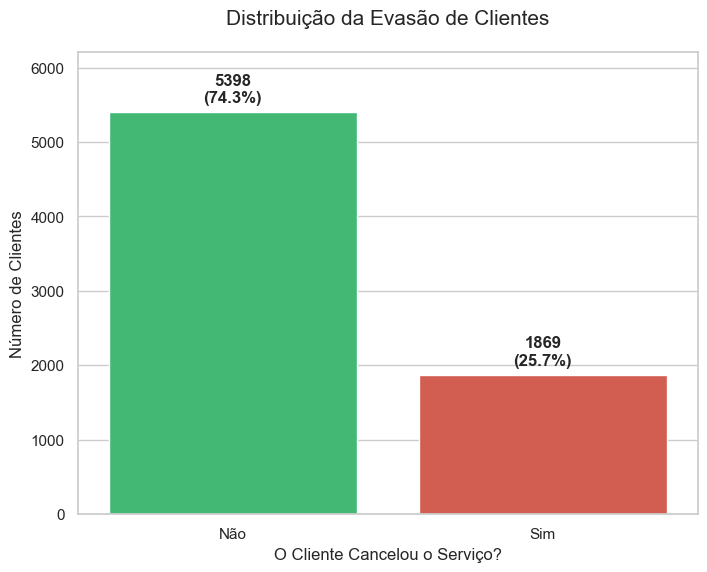

In [ ]:
# Configurando o estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
cores = ["#2ecc71", "#e74c3c"]

# Gerando o gráfico de contagem
ax = sns.countplot(
    data=df, 
    x='Cancelou_Servico', 
    hue='Cancelou_Servico', 
    palette=cores, 
    order=['Não', 'Sim'],
    legend=False
)

# Adicionando porcentagens e valores exatos
total = len(df)
for p in ax.patches:
    altura = p.get_height()
    porcentagem = f'{100 * altura / total:.1f}%'
    ax.annotate(f'{int(altura)}\n({porcentagem})', 
                (p.get_x() + p.get_width() / 2., altura), 
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribuição da Evasão de Clientes', fontsize=15, pad=20)
plt.xlabel('O Cliente Cancelou o Serviço?', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.ylim(0, df['Cancelou_Servico'].value_counts().max() * 1.15)

plt.show()

* Não (Permaneceram): Aproximadamente 74,3% dos clientes (cerca de 5.398 registros).
* Sim (Saíram): Aproximadamente 25,7% dos clientes (cerca de 1.869 registros).

Esta taxa de churn de quase 26% é considerada alta para o setor de telecomunicações e confirma a necessidade de estratégias de retenção imediatas.

**Contagem de Evasão por Variáveis Categóricas**

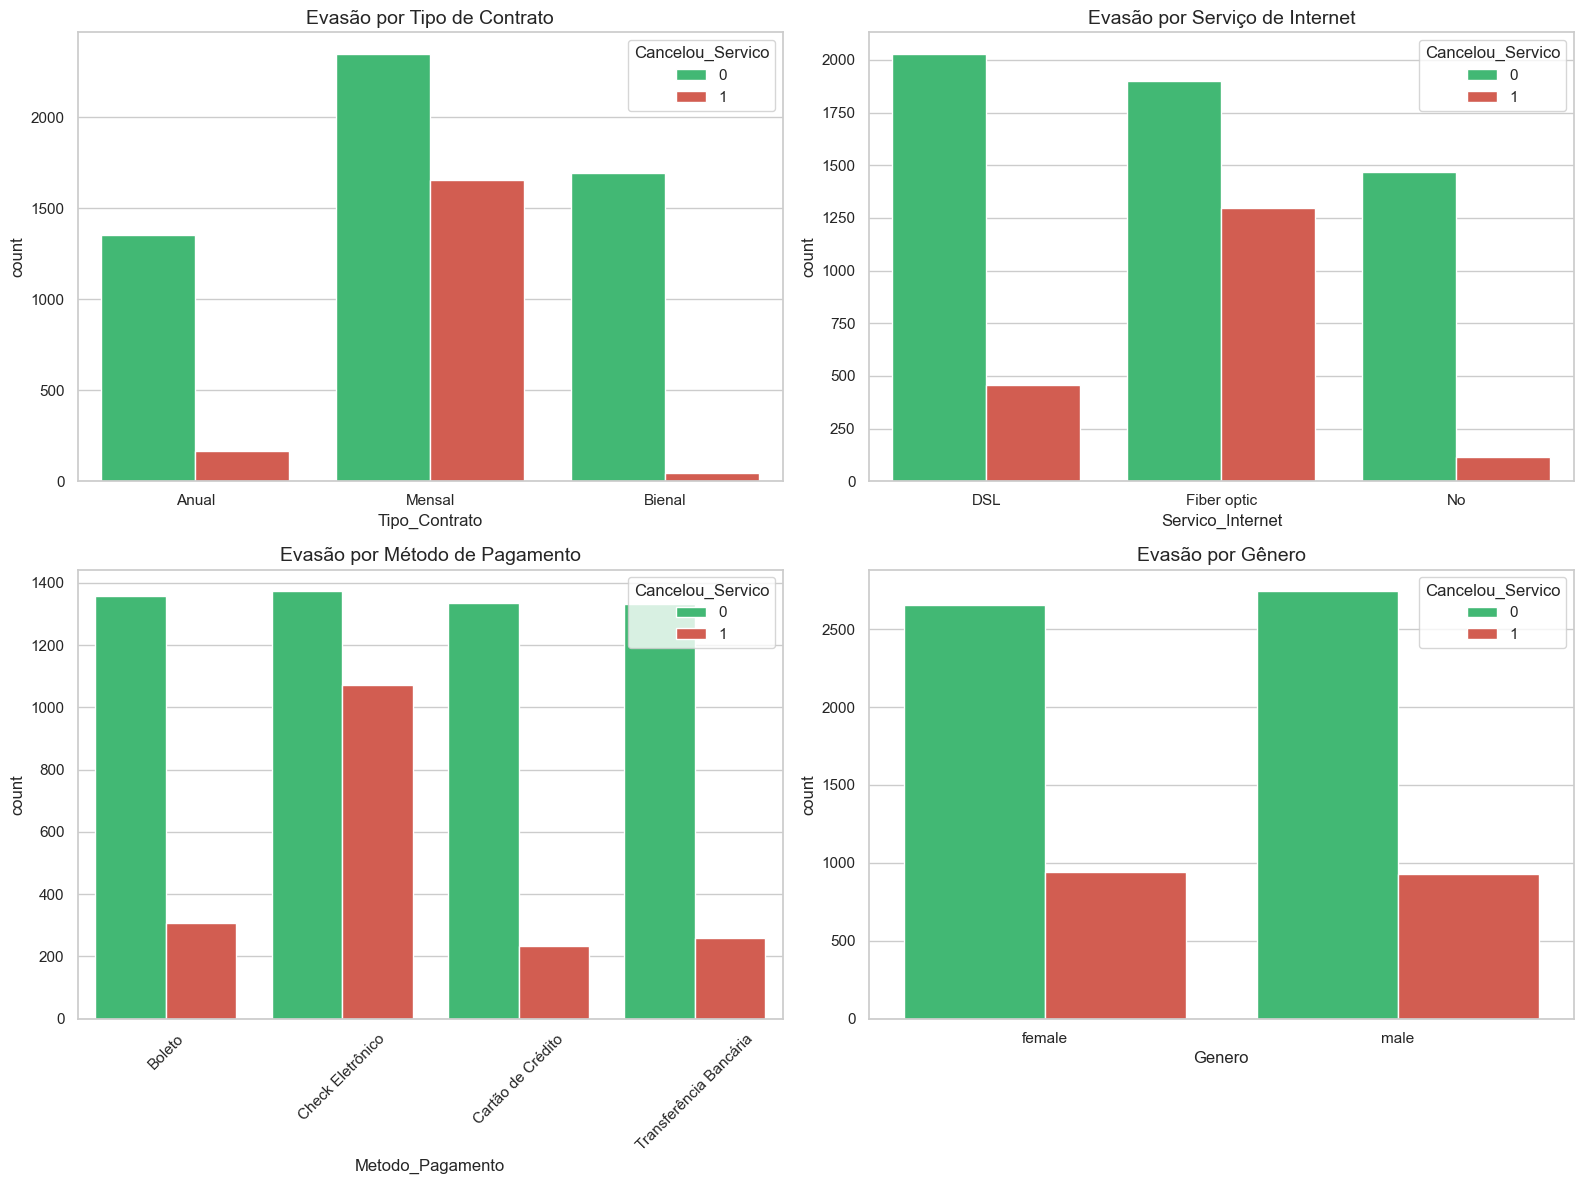

In [36]:
# Configurando o layout para múltiplos gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set_theme(style="whitegrid")

# Churn por Tipo de Contrato
sns.countplot(data=df, x='Tipo_Contrato', hue='Cancelou_Servico', palette=["#2ecc71", "#e74c3c"], ax=axes[0,0])
axes[0,0].set_title('Evasão por Tipo de Contrato', fontsize=14)

# Churn por Serviço de Internet
sns.countplot(data=df, x='Servico_Internet', hue='Cancelou_Servico', palette=["#2ecc71", "#e74c3c"], ax=axes[0,1])
axes[0,1].set_title('Evasão por Serviço de Internet', fontsize=14)

# Churn por Método de Pagamento (Rotacionando nomes longos)
sns.countplot(data=df, x='Metodo_Pagamento', hue='Cancelou_Servico', palette=["#2ecc71", "#e74c3c"], ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_title('Evasão por Método de Pagamento', fontsize=14)

# Churn por Gênero
sns.countplot(data=df, x='Genero', hue='Cancelou_Servico', palette=["#2ecc71", "#e74c3c"], ax=axes[1,1])
axes[1,1].set_title('Evasão por Gênero', fontsize=14)

plt.tight_layout()
plt.show()

1. *O "Vilão" do Churn: Contrato Mensal*

* Clientes com contrato Mês a Mês (Month-to-month) têm uma taxa de evasão altíssima de 41,3%.
* Em comparação, clientes com contrato de Dois anos quase não saem (apenas 2,7%).
* Insight: A empresa precisa criar incentivos para migrar clientes do plano mensal para o anual.

2. *O Problema da Fibra Óptica*

* Surpreendentemente, clientes de Fibra Óptica (Fiber optic) saem muito mais (40,5%) do que clientes de DSL (18,4%).
* Insight: Isso sugere que, embora a fibra seja uma tecnologia superior, o preço elevado ou possíveis instabilidades técnicas podem estar frustrando os clientes.

3. *Método de Pagamento e Evasão*

* O método Electronic check (Cheque Eletrônico) está ligado a 43,8% das desistências.
* Clientes com pagamento automático (Cartão ou Transferência) são muito mais fiéis.

4. *Neutralidade de Gênero*

* A evasão entre homens (25,3%) e mulheres (26,1%) é praticamente a mesma. Isso indica que campanhas baseadas em gênero podem não ser tão eficazes quanto campanhas baseadas no tipo de serviço.

**Contagem de Evasão por Variáveis Numéricas**

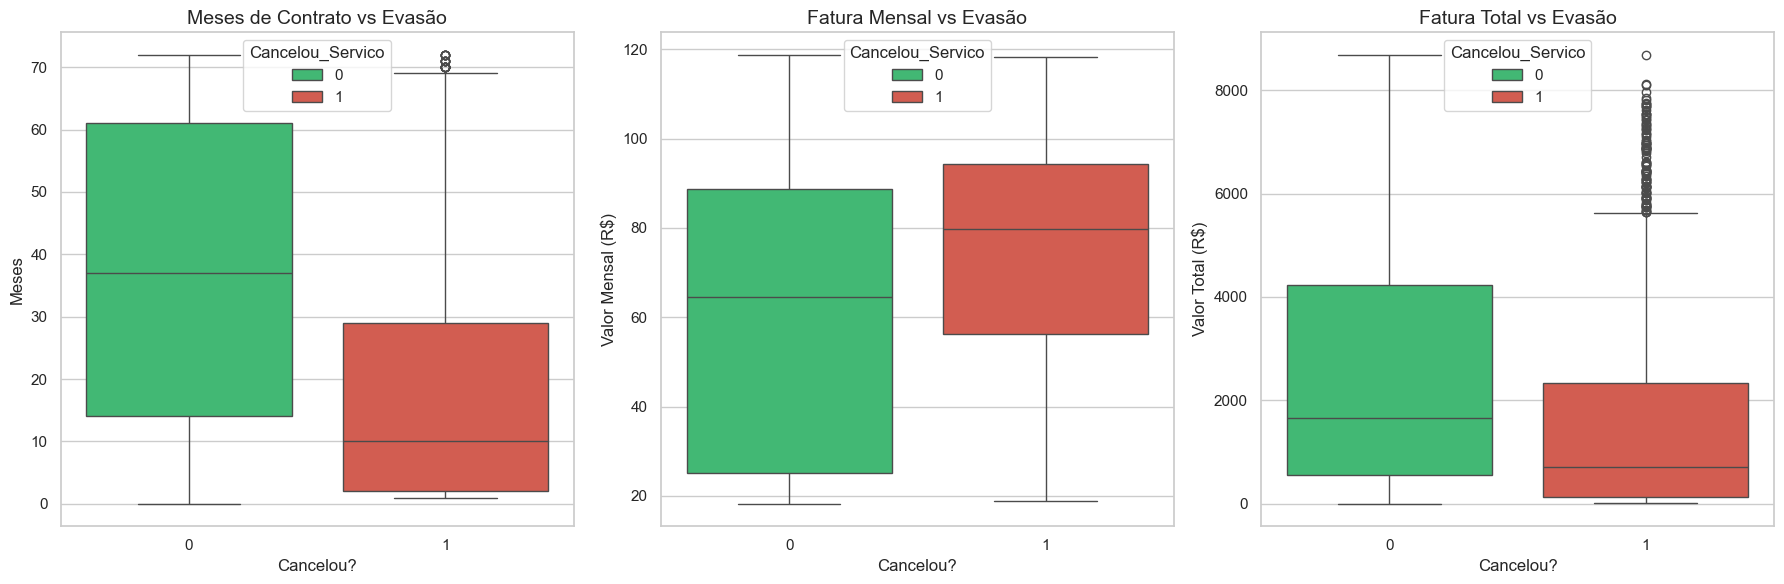

In [38]:
# Configurando o layout para 3 gráficos lado a lado
plt.figure(figsize=(18, 6))
sns.set_theme(style="whitegrid")

# Cores: Verde (Não) e Vermelho (Sim)
cores = ["#2ecc71", "#e74c3c"]

# Comparação de Tempo de Contrato (Meses)
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Cancelou_Servico', y='Meses_Contrato', hue='Cancelou_Servico', palette=cores)
plt.title('Meses de Contrato vs Evasão', fontsize=14)
plt.xlabel('Cancelou?')
plt.ylabel('Meses')

# Comparação de Valor da Fatura Mensal
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Cancelou_Servico', y='Fatura_Mensal', hue='Cancelou_Servico', palette=cores)
plt.title('Fatura Mensal vs Evasão', fontsize=14)
plt.xlabel('Cancelou?')
plt.ylabel('Valor Mensal (R$)')

# Comparação de Faturamento Total Acumulado
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Cancelou_Servico', y='Fatura_Total', hue='Cancelou_Servico', palette=cores)
plt.title('Fatura Total vs Evasão', fontsize=14)
plt.xlabel('Cancelou?')
plt.ylabel('Valor Total (R$)')

plt.tight_layout()
plt.show()

| Variável | Clientes que Ficaram (Mediana) | Clientes que Saíram (Mediana) | O que isso significa? |
| :--- | :--- | :--- | :--- |
| **Meses de Contrato** | 37 meses | 10 meses | A evasão é um problema de "curto prazo". Quem passa do primeiro ano tende a ser muito fiel. |
| **Fatura Mensal** | R$ 64,50 | R$ 79,65 | Clientes que pagam faturas mais caras têm maior propensão a cancelar. |
| **Fatura Total** | R$ 1.663,62 | R$ 703,55 | O valor acumulado é menor em quem sai, pois eles cancelam o serviço logo no início da jornada. |

**Recomendações Estratégicas**

Com base nos achados, sugerimos as seguintes ações:

1. Incentivo à Migração: Criar campanhas de desconto para migrar clientes do plano "Mensal" para o "Anual", focando nos primeiros 6 meses de contrato.

2. Pacotes de Valor (Cross-selling): Oferecer serviços de segurança e suporte técnico como bônus para novos clientes, aumentando a "ancoragem" no ecossistema da empresa.

3. Auditoria na Fibra Óptica: Realizar uma pesquisa de satisfação específica para usuários de Fibra para entender se o Churn elevado se deve ao valor da fatura ou à qualidade do sinal.

4. Programa de Fidelidade Precoce: Implementar benefícios progressivos para clientes que ultrapassarem a marca de 1 ano de contrato.